## Отбор признаков

In [9]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import train_test_split
import seaborn as sns
GLOB_RAND_STATE = 0
np.random.seed(GLOB_RAND_STATE)

import matplotlib.pyplot as plt 
%matplotlib inline

**Описание контекста задачи**
В некоторой компании занимающейся услугами мобильной связи для клиентов доступны дополнительные платные услуги A, B и C,которые взаимоисключают друг друга. Руководство компании хочет построить модель, которая будет для каждого клиента определять наиболее подходящую ему услугу для таргетированной рекламы этих услуг внутри компании.
**Описание датасета**
Каждая строка в датасете определяет одного клиента компани и дополнительную услугу.
В датасете имеются следующие колонки:
- age: возраст клиента
- No: номер договора
- month_from_start: количество месяцев с даты заключения договора
- base_cost: стоимость основного тарифа в рублях
- block_count: количество блокировок
- is_used_app: использует ли мобильное приложение
- month_incall_mean: среднее количество входящих звонков в месяц
- month_outcall_mean: среднее количество исходящих звонков в месяц
- add_service: дополнительная платная услуга

In [10]:
df = pd.read_csv('mobile_service.csv')
df.head()

,age,No,month_from_start,base_cost,block_count,is_used_app,month_incall_mean,month_outcall_mean,add_service
0,35.0,768371537,42,220,1,0,340.235037,67.000000,2
1,40.0,38583605,17,190,4,0,62.524493,182.524493,3
2,40.0,769467030,56,350,1,0,354.886642,408.886642,2
3,41.0,91661755,26,220,4,0,311.985570,326.985570,3
4,52.0,5615024,14,220,3,0,421.616580,15.000000,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1300 non-null   float64
 1   No                  1300 non-null   int64  
 2   month_from_start    1300 non-null   int64  
 3   base_cost           1300 non-null   int64  
 4   block_count         1300 non-null   int64  
 5   is_used_app         1300 non-null   int64  
 6   month_incall_mean   1300 non-null   float64
 7   month_outcall_mean  1300 non-null   float64
 8   add_service         1300 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 91.5 KB


In [12]:
X = df.drop('add_service', axis=1).copy()
y = df['add_service'].copy()

Два признака будут исключены из датасета если использовать метод отбора признаков, основанный на статистике хи-квадрат c конечным количеством признаков 6 (9 всего - 1 таргет - 2 признака)

In [13]:
sel_k_best = SelectKBest(chi2, k=6)
sel_k_best.fit(X, y)
X_selected = pd.DataFrame(sel_k_best.transform(X),
                    columns=[a for a,b in zip(X.columns,sel_k_best.get_support()) if b])
set(X.columns) - set(X_selected.columns)

{'base_cost', 'block_count'}

Два признака будут присутствовать в датасете если использовать метод отбора признаков RFE, с параметрами estimator=sklearn.tree.DecisionTreeClassifier и step=1 c конечным количеством признаков 3 с различными random_state:

In [14]:
tree = DecisionTreeClassifier()
rfe = RFE(tree, n_features_to_select=2, step=1)
rfe.fit(X, y)
X_selected = pd.DataFrame(rfe.transform(X),
                columns=[a for a,b in zip(X.columns,rfe.get_support()) if b])
X_selected.columns

Index(['age', 'month_outcall_mean'], dtype='object')

Два признака в датасете имеют коэффициент корреляции > 0.5 (между собой, не с таргетом):

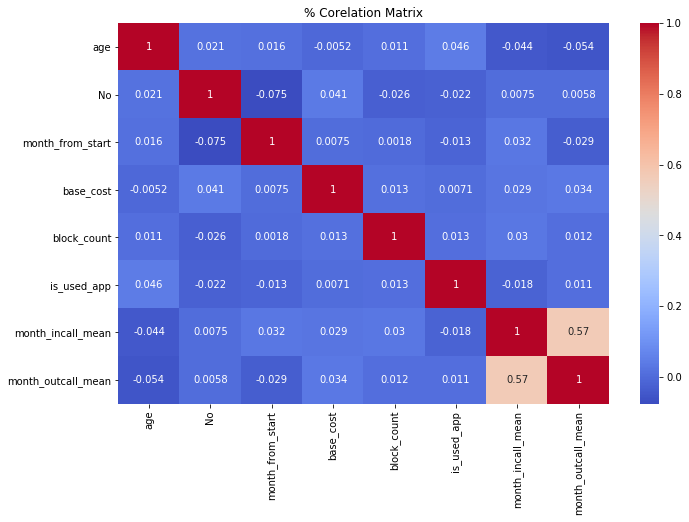

In [15]:
plt.figure(figsize=(11,7))
sns.heatmap(cbar=True,annot=True,data=X.corr(),cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()

month_outcall_mean, month_incall_mean